In [1]:
#uncomment to clean up the variables
%reset -f

In [2]:
#change the folder to your default installation folder
folder = '/Users/matteoferro/Library/Python/3.9/lib/python/site-packages/pyetc_dev/'

from pyetc_dev import *
import os
import matplotlib.pyplot as plt
from astropy import constants
import skycalc_ipy
from mpdaf.obj import Spectrum
#from astropy import constants

import warnings
warnings.filterwarnings('ignore')

#this is a package of mine for plot quality, comment it and the following row in case you use this notebook 
from setplot import set_plot_style
set_plot_style()

In [3]:
### set up the container
obj = VLT(log = 'DEBUG', skip_dataload = False)

In [4]:
sed_models = SEDModels()

print(sed_models.eso_spectra_files.keys())

dict_keys(['Pickles_O5V', 'Kinney_starb5', 'Kinney_starb4', 'Kinney_sa', 'Kinney_starb6', 'Pickles_O9V', 'Kinney_sb', 'Galev_E', 'Pickles_B2IV', 'Kinney_s0', 'Kinney_starb3', 'Kinney_starb2', 'Pickles_A0III', 'Kinney_starb1', 'Pickles_A0V', 'Pickles_K2V', 'Kurucz_B8V', 'Pickles_G0V', 'Pickles_M2V', 'Kurucz_G2V', 'Pickles_B9III', 'Kurucz_A1V', 'Pickles_B9V', 'Kurucz_B1V', 'Kurucz_F0V', 'Kinney_ell', 'Pickles_K7V', 'qso-interp'])


In [5]:
#Obj_SED = template, pl, bb, line

#COADD_WL = binning of the spectral trace, integer

#SED_Name is the name of the template, you can list them with sed_models.eso_spectra_files.keys()

################ only for line #############################
#SPEC_range = fixed, adaptative, None

#### only for fixed ####
#SPEC_HSIZE = 5 [range will be 2 * SPEC_HSIZE + 1]
########################

#### only for adaptative ####
#SPEC_KFWHM = 3 [range will be +- SPEC_KFWHM]
#OPT_SPEC = True, to compute the best SPEC_KFWHM for the maximization of the SNR
#############################
############################################################


#Obj_Spat_Dis = sb, ps, resolved

################ only for resolved ###############################
#IMA = moffat, sersic 

#Ext_Ell = 0.

#### only for moffat ####
#IMA_FWHM = 1. in arcsec
#IMA_BETA = 2.5 in arcsec
#IMA_KFWHM = 3 by default
#########################

#### only for sersic ####
#Sersic_Reff = 1. in arcsec
#Sersic_Ind = 2.
#IMA_KREFF = 6 by default
#########################

##################################################################

################ only for sb ###############################
#IMA_AREA = 1. arcsec, area to use for the SNR computation
#! ! ! substituted by the COADD_XY: number of spaxel per size directly
############################################################

################ only for ps and resolved ##################
#IMA_RANGE = circular_adaptative, square_fixed

#### only for square_fixed ####
#IMA_HSIZE = 5 [range will be 2 * IMA_HSIZE + 1] #INTEGER ! ! ! substituted by the COADD_XY: number of 
#spaxel per size directly
###############################

#### only for circular_adaptative ####
#IMA_KFWHM = 3 [range will be +- IMA_KFWHM]
#OPT_IMA = True, to compute the best IMA_KFWHM for the maximization of the SNR
######################################
############################################################

### "SKYCALC": if false it uses the default configurations in the folder using MOON, 
###true it computes the sky with a call to the ESO Skycalc and want the FLI and PWV parameters

# SNR & Lam_Ref are the target SNR at a specific wave if you want to compute the NDIT or DIT

# DISP is the displacement needed in arcsec, used only in the MOS case (0 for no displacement), 
# could be None for IFS

#Here an example of how it should be

full_obs = {
    "INS": "giraffe",
    "CH": "blue",
    
    "NDIT": 2,
    "DIT": 1000, 
    
    "SNR": 100,
    "Lam_Ref":3900,
    
    "DISP": 0.3,
    
    "MOON": None,
    "PWV": 10,
    "FLI": 0,
    "SEE": 0.5,
    "AM": 1.16,
    "SKYCALC": True,
    
    "Obj_SED": 'template',
    "SED_Name": 'Kinney_S0',
    
    "OBJ_MAG": 16,
    "MAG_SYS": 'Vega',
    "MAG_FIL": 'V',
    
    "Z": 0,
    "BB_Temp": 4000.,
    "PL_Index": None,
    
    "SEL_FLUX": 50e-16,
    "SEL_CWAV": 7000,
    "SEL_FWHM":20,
    
    "Obj_Spat_Dis": 'ps',
    
    "IMA": 'moffat',
    "Ext_Ell": 0.,
    
    "IMA_FWHM": 0.8,
    "IMA_BETA": 99,
    "IMA_KFWHM": 5,
    
    "Sersic_Reff": 0.5,
    "Sersic_Ind": 0.5,
    "IMA_KREFF": 5,
    
    "SPEC_RANGE": 'fixed',
    "SPEC_KFWHM": 10,
    "SPEC_HSIZE": 30,
    
    "COADD_WL": 1,
    
    "IMA_RANGE": 'square_fixed',
    "COADD_XY":1,
    
    "OPT_SPEC": False,
    "OPT_IMA": False,
    "FRAC_SPEC_MEAN_OPT_IMAGE": 1
}

#"IMA_AREA": (1*0.2)**2,
#"IMA_HSIZE": 1,

giraffe blue: wave ≈ 3857.0 Å → FWHM = 0.903 arcsec


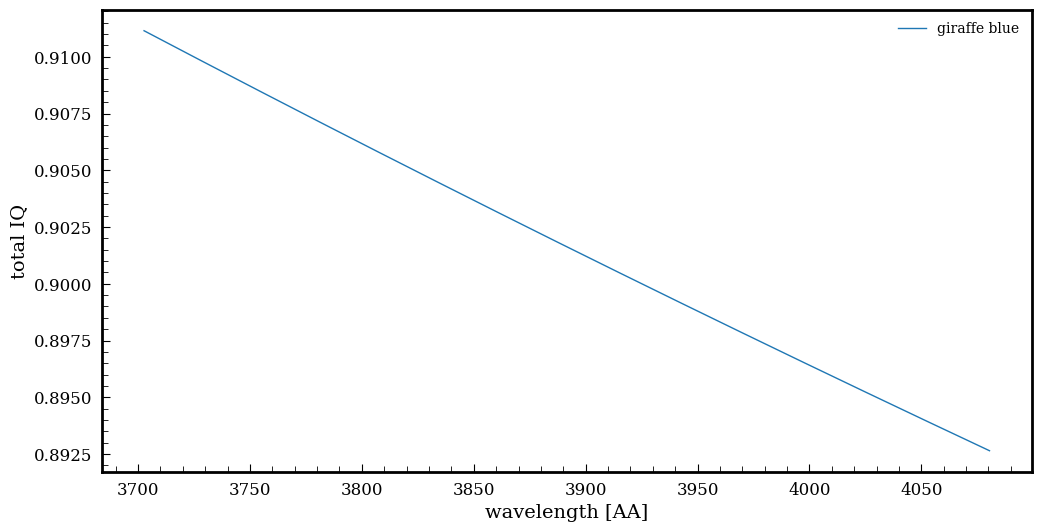

In [6]:
from pyetc_dev.etc import get_seeing_fwhm, show_noise
import matplotlib.pyplot as plt


full_obs['SEE'] = 0.8

fig, ax = plt.subplots()

#change this to see how it changes the IQ
#! ! ! QUI A TENTATIVI PER VEDERE CHE SEEING DEVO METTERE NEL MIO DIZIONARIO PER AVERE UNA CERTA IQ_FWHM (TENGO 1)
seeing = full_obs['SEE']
airmass = full_obs['AM']

# For giraffe instrument
for chan in obj.giraffe['channels']:
    inst = obj.giraffe[chan]
    wave = inst['instrans'].wave.coord()  # Assuming instrans has the wavelength coordinate
    fwhm = get_seeing_fwhm(seeing, airmass, wave, obj.tel['diameter'], inst['iq_fwhm_tel'], inst['iq_fwhm_ins'])[0]
    ax.plot(wave, fwhm, label=f"giraffe {chan}")
    
    #reference wave
    X = 3857
    idx = np.argmin(np.abs(wave - X))
    closest_wave = wave[idx]
    fwhm_at_X = fwhm[idx]
    print(f"giraffe {chan}: wave ≈ {closest_wave:.1f} Å → FWHM = {fwhm_at_X:.3f} arcsec")

ax.legend()
ax.set_ylabel('total IQ')
ax.set_xlabel('wavelength [AA]');

In [7]:
con, ob, spe, im, spe_input = obj.build_obs_full(full_obs)

In [8]:
con['spaxel_size']

0.3

In [9]:
res_time = obj.time_from_source_MOS(con, im, spe, dit=True)

Computing DIT for target SNR: 100
Computed DIT: 109068.86 > 109069.00 for target SNR: 100.00 at wavelength 3900.00 A, in 8 vertical pixels
% % % Computing fraction of saturated pixels % % %
Fraction of saturated voxels: 0.0% for saturation level 65000.00 counts
[DEBUG] Source type ps & cont
Time elapsed: 0.02 seconds


In [10]:
ob

{'moon': None,
 'airmass': 1.16,
 'seeing': 0.8,
 'ndit': 2,
 'dit': 109069.0,
 'spec_type': 'cont',
 'spec_range_type': 'fixed',
 'spec_range_kfwhm': 10,
 'spec_range_hsize_spectels': 30,
 'ima_type': 'ps',
 'ima_area': None,
 'ima_aperture_type': 'square_fixed',
 'ima_kfwhm': 5,
 'ima_aperture_hsize_spaxels': 0,
 'skycalc': True,
 'wave_center': 7000,
 'snr': 100,
 'snr_wave': 3900,
 'disp': 0.3,
 'skyemi': <Spectrum(shape=(3149,), unit='', dtype='>f8')>,
 'skyabs': <Spectrum(shape=(3149,), unit='', dtype='>f8')>}

In [11]:
res = obj.snr_from_source_MOS(con, im, spe)

[DEBUG] ima_type & spec are: ps & cont
[DEBUG] frac_flux & tspec shape: (3149,) & (3149,)
[DEBUG] number of coadded vertical pixels: 8.0
[DEBUG] Computation for the MOS done. Source type ps & cont Flux 1.00e+00 S/N 94.3 FracFlux 0.598 Npixels vertical 8
Time elapsed: 0.08 seconds


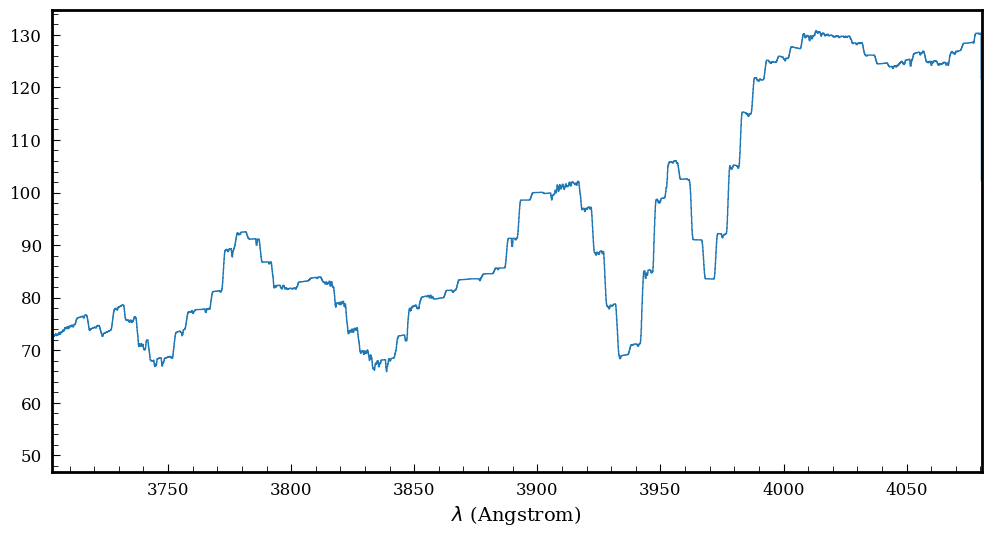

In [12]:
res['spec']['snr'].plot()

In [13]:
snr_central = res['spec']['snr']

foldd = 'MOS_snr_comparison/'
nm = 'test9'
data = np.loadtxt(foldd + nm + '.txt')

x = data[:, 0] * 10   
y = data[:, 1]

if full_obs['SPEC'] == 'line':
    # Calculate total integral (0 to inf)
    muse_total = np.trapz(y, x)
    pyetc_total = np.trapz(snr_central.data, snr_central.wave.coord())
    
    # Calculate integral within 1 FWHM
    target_wavelength = full_obs['WAVE_CENTER']
    half_window = int(full_obs['WAVE_FWHM']/2)  # ±HWHM
    
    idx_closest = np.abs(x - target_wavelength).argmin()
    start = max(0, idx_closest - half_window)
    end = min(len(x), idx_closest + half_window + 1)
    
    muse_fwhm = np.trapz(y[start:end], x[start:end])
    pyetc_interp = np.interp(x[start:end], snr_central.wave.coord(), snr_central.data)
    pyetc_fwhm = np.trapz(pyetc_interp, x[start:end])
    
    # Plot single graph with integral values
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, label='GIRAFFE ETC', alpha=0.5)
    plt.plot(snr_central.wave.coord(), snr_central.data, label='pyetc_dev', alpha=0.5)
    
    # Add text with integral values
    text = f"Total integrals (0 to inf):\n"
    text += f"GIRAFFE: {muse_total:.2f}\n"
    text += f"pyetc: {pyetc_total:.2f}\n"
    text += f"Rel. diff: {(pyetc_total-muse_total)/muse_total*100:.2f}%\n\n"
    text += f"Integrals within FWHM:\n"
    text += f"GIRAFFE: {muse_fwhm:.2f}\n"
    text += f"pyetc: {pyetc_fwhm:.2f}\n"
    text += f"Rel. diff: {(pyetc_fwhm-muse_fwhm)/muse_fwhm*100:.2f}%"
    
    plt.text(0.02, 0.98, text, transform=plt.gca().transAxes, 
             verticalalignment='top', fontsize=8,
             bbox=dict(facecolor='white', alpha=0.8))
    
    plt.legend(loc='best')
    plt.ylabel('SNR')
    plt.xlabel('wavelength [Å]')
    plt.grid(True, alpha=0.2)
    plt.xlim(target_wavelength-200, target_wavelength+200)
    
else:
    # Create figure with two vertically stacked subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    fig.subplots_adjust(hspace=0.05)

    # Top subplot - SNR comparison
    ax1.plot(x, y, label='GIRAFFE ETC', alpha=0.5)
    ax1.plot(snr_central.wave.coord(), snr_central.data, label='pyetc_dev', alpha=0.5)
    ax1.legend(loc='best')
    ax1.set_ylabel('SNR')
    ax1.grid(True, alpha=0.2)

    # Bottom subplot - Ratio (only for overlapping wavelength range)
    # Find overlapping wavelength range
    x_pyetc = snr_central.wave.coord()
    overlap_min = max(x.min(), x_pyetc.min())
    overlap_max = min(x.max(), x_pyetc.max())
    
    # Create common wavelength grid for the overlapping region
    overlap_mask_x = (x >= overlap_min) & (x <= overlap_max)
    overlap_mask_pyetc = (x_pyetc >= overlap_min) & (x_pyetc <= overlap_max)
    
    # Use the wavelength grid with higher resolution for interpolation
    if len(x[overlap_mask_x]) > len(x_pyetc[overlap_mask_pyetc]):
        # Use GIRAFFE wavelength grid
        x_common = x[overlap_mask_x]
        y_common = y[overlap_mask_x]
        pyetc_interp = np.interp(x_common, x_pyetc, snr_central.data)
    else:
        # Use pyetc wavelength grid
        x_common = x_pyetc[overlap_mask_pyetc]
        pyetc_interp = snr_central.data[overlap_mask_pyetc]
        y_common = np.interp(x_common, x, y)
    
    # Calculate ratio
    ratio = (pyetc_interp - y_common) / y_common * 100
    
    # Apply additional mask for specific regions
    mask = ((x_common >= 4850) & (x_common <= 9280)) & ((x_common < 5600) | (x_common > 6100))
    x_masked = x_common#[mask]
    ratio_masked = ratio#[mask]
    
    # Plot masked ratio
    ax2.plot(x_masked, ratio_masked, color='red', alpha=0.5)
    ax2.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax2.axhline(y=np.mean(ratio_masked), color='blue', linestyle=':', alpha=1, 
                label=f'mean rel. diff. {np.mean(ratio_masked):.2f}%')
    ax2.set_ylabel('Relative Difference [%]')
    ax2.set_xlabel('wavelength [Å]')
    ax2.grid(True, alpha=0.2)
    ax2.legend(loc='best')
    
    ax1.set_title('Kinney S0 @ z = 0 - V Vega 16 Dark-Sky - DIT = 1000 sec - NDIT = 1 - displacement = 0.3',
           fontsize=10)
    #ax1.set_title('Black Body T 4000 K - R Vega 18 Bright-Sky - DIT = 1000 sec - NDIT = 1 - displacement = 0.3',
    #        fontsize=10)

plt.savefig(foldd + nm)
plt.show()

KeyError: 'SPEC'

In [ ]:
def fiber_aperture_convolution_try(ins, ima, displacement=0.0, print_info=False, plot_result=False):
    """
    Convolve a source image with the fiber aperture response function.
    
    This function applies a circular aperture mask to the input image, setting
    all pixels outside the fiber aperture to zero and calculating the fraction
    of original flux that is collected.
    
    Parameters
    ----------
    ins : dict
        instrument configuration dictionary containing 'aperture' (fiber diameter in arcsec)
        and 'spaxel_size' (spaxel size in arcsec)
    ima : MPDAF Image
        input source image to be convolved with fiber aperture
    displacement : float
        displacement of fiber center from image center along x-axis in arcsec (Default value = 0.0)
    print_info : bool
        if True, prints information about the flux fraction and aperture size (Default value = False)
    plot_result : bool
        if True, creates a plot showing the original image and fiber aperture (Default value = False)
        
    Returns
    -------
    tuple
        ima_out : MPDAF Image
            output image with aperture mask applied (pixels outside aperture set to zero)
        flux_fraction : float
            fraction of original flux collected by the fiber aperture
        n_spaxels_vertical : int
            number of vertical spaxels from top to bottom edge of the aperture
    """
    
    # Get aperture parameters
    aperture_diameter = ins['aperture']  # in arcsec
    aperture_radius = aperture_diameter / 2.0  # in arcsec
    spaxel_size = ins['spaxel_size']  # in arcsec
    
    # Create a copy of the input image
    ima_out = ima.copy()
    
    # Calculate the aperture radius in pixels
    # Account for oversampling if present
    oversamp = getattr(ima, 'oversamp', 1)
    aperture_radius_pix = aperture_radius * oversamp / spaxel_size
    displacement_x_pix = displacement * oversamp / spaxel_size
    
    # Get image dimensions
    ny, nx = ima.shape
    
    # Calculate fiber center position (image center + displacement)
    image_center_y, image_center_x = ny // 2, nx // 2
    fiber_center_x = image_center_x + displacement_x_pix
    fiber_center_y = image_center_y  # No displacement in y
    
    # Create coordinate grids
    y_coords, x_coords = np.mgrid[0:ny, 0:nx]
    
    # Calculate distance from fiber center for each pixel
    distances = np.sqrt((x_coords - fiber_center_x)**2 + (y_coords - fiber_center_y)**2)
    
    # Create circular aperture mask (True inside aperture, False outside)
    aperture_mask = distances <= aperture_radius_pix
    
    # Calculate original total flux
    original_flux = np.sum(ima.data)
    
    # Apply aperture mask - set pixels outside aperture to zero
    ima_out.data[~aperture_mask] = 0.0
    
    # Calculate flux after aperture application
    collected_flux = np.sum(ima_out.data)
    
    # Calculate flux fraction
    if original_flux > 0:
        flux_fraction = collected_flux / original_flux
    else:
        flux_fraction = 0.0
    
    # Calculate number of vertical spaxels in aperture (NON-OVERSAMPLED)
    n_spaxels_vertical = int(aperture_diameter / spaxel_size + 0.5)
    
    if print_info:
        print(f"Original flux: {original_flux:.3e}")
        print(f"Collected flux: {collected_flux:.3e}")
        print(f"Fraction of flux collected: {flux_fraction:.3f} ({flux_fraction*100:.1f}%)")
        print(f"Number of vertical spaxels in aperture: {n_spaxels_vertical}")
        print(f"Fiber displacement: {displacement:.2f} arcsec ({displacement_x_pix:.2f} pixels)")
        print(f"Fiber center: ({fiber_center_x:.1f}, {fiber_center_y:.1f}) pixels")
    
    # Create plot if requested
    if plot_result:
        import matplotlib.pyplot as plt
        import matplotlib.patches as patches
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
        
        # Calculate extent for proper coordinate display in arcsec
        extent_pix = [-nx//2, nx//2, -ny//2, ny//2]
        extent_arcsec = [x * spaxel_size / oversamp for x in extent_pix]
        
        # Plot 1: Original image
        im1 = ax1.imshow(ima.data, origin='lower', extent=extent_arcsec, cmap='viridis')
        ax1.set_title('Original Image')
        ax1.set_xlabel('Arcsec')
        ax1.set_ylabel('Arcsec')
        plt.colorbar(im1, ax=ax1, label='Flux')
        
        # Add fiber aperture circle to original image
        fiber_center_x_arcsec = (fiber_center_x - nx//2) * spaxel_size / oversamp
        fiber_center_y_arcsec = (fiber_center_y - ny//2) * spaxel_size / oversamp
        image_center_x_arcsec = 0.0
        image_center_y_arcsec = 0.0
        
        circle1 = plt.Circle((fiber_center_x_arcsec, fiber_center_y_arcsec), 
                            aperture_radius, fill=False, color='red', linewidth=2)
        ax1.add_patch(circle1)
        
        # Add center markers and displacement line
        ax1.plot(image_center_x_arcsec, image_center_y_arcsec, 'ro', markersize=5, label='Image center')
        ax1.plot(fiber_center_x_arcsec, fiber_center_y_arcsec, 'r+', markersize=8, label='Fiber center')
        
        if displacement != 0:
            ax1.plot([image_center_x_arcsec, fiber_center_x_arcsec], 
                    [image_center_y_arcsec, fiber_center_y_arcsec], 
                    'r--', linewidth=1, alpha=0.7)
        
        ax1.legend()
        
        # Plot 2: Image after fiber convolution
        im2 = ax2.imshow(ima_out.data, origin='lower', extent=extent_arcsec, cmap='viridis')
        ax2.set_title('After Fiber Convolution')
        ax2.set_xlabel('Arcsec')
        ax2.set_ylabel('Arcsec')
        plt.colorbar(im2, ax=ax2, label='Flux')
        
        # Add fiber aperture circle to convolved image
        circle2 = plt.Circle((fiber_center_x_arcsec, fiber_center_y_arcsec), 
                            aperture_radius, fill=False, color='red', linewidth=2)
        ax2.add_patch(circle2)
        
        # Add center markers
        ax2.plot(image_center_x_arcsec, image_center_y_arcsec, 'ro', markersize=5, label='Image center')
        ax2.plot(fiber_center_x_arcsec, fiber_center_y_arcsec, 'r+', markersize=8, label='Fiber center')
        
        if displacement != 0:
            ax2.plot([image_center_x_arcsec, fiber_center_x_arcsec], 
                    [image_center_y_arcsec, fiber_center_y_arcsec], 
                    'r--', linewidth=1, alpha=0.7)
        
        ax2.legend()
        
        # Add text with information
        info_text = (f"Aperture diameter: {aperture_diameter:.2f} arcsec\n"
                    f"Displacement: {displacement:.2f} arcsec\n"
                    f"Flux fraction: {flux_fraction:.3f} ({flux_fraction*100:.1f}%)\n"
                    f"Vertical spaxels: {n_spaxels_vertical}")
        
        fig.suptitle(info_text, fontsize=10, y=0.02)
        plt.tight_layout()
        plt.subplots_adjust(bottom=0.15)
        plt.show()
    
    return ima_out, flux_fraction, 2 * n_spaxels_vertical

In [ ]:
IOUT, FF, NS = fiber_aperture_convolution_try(con, im, displacement=0.3, print_info=False, plot_result=True)

In [ ]:
0.8/3